# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
output_data_file = (r"C:\Users\vanes\python-api-challenge\cities.csv")

### Generate the Cities List by Using the `citipy` Library

In [18]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


In [101]:
cities

['afaahiti',
 'bilibino',
 'anadyr',
 'sedalia',
 'forster',
 'kodiak',
 'bardstown',
 'miri',
 'remire-montjoly',
 'hasaki',
 'waitangi',
 'villa alberto andres alvarado aramburo',
 'bethel',
 'arraial do cabo',
 'yellowknife',
 'ust-tsilma',
 'la passe',
 'adamstown',
 'urangan',
 'puerto natales',
 'salinas',
 'hamilton',
 'twin falls',
 'al qusiyah',
 'alofi',
 'iqaluit',
 'ha giang',
 'phan thiet',
 'key west',
 'sao joaquim',
 'mazamari',
 'toga village',
 'blackmans bay',
 'vizinga',
 'uturoa',
 'port-aux-francais',
 'hawaiian paradise park',
 'togur',
 'aquiraz',
 'chukhloma',
 'lihue',
 'hammamet',
 'san antonio de pale',
 'grytviken',
 'belmonte',
 'monrovia',
 'port alfred',
 'invercargill',
 'albany',
 'tadine',
 'jeremie',
 'abalak',
 'edinburgh of the seven seas',
 'kiunga',
 'cascavel',
 'kapuskasing',
 'daloa',
 'dalbandin',
 'margaret river',
 'whitehorse',
 'klyuchi',
 'taoudenni',
 'prince rupert',
 'mar del plata',
 "nar'yan-mar",
 'kananga',
 'constantia',
 'ilulis

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [102]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | afaahiti
City not found. Skipping...
Processing Record 2 of Set 1 | bilibino
City not found. Skipping...
Processing Record 3 of Set 1 | anadyr
City not found. Skipping...
Processing Record 4 of Set 1 | sedalia
City not found. Skipping...
Processing Record 5 of Set 1 | forster
City not found. Skipping...
Processing Record 6 of Set 1 | kodiak
City not found. Skipping...
Processing Record 7 of Set 1 | bardstown
City not found. Skipping...
Processing Record 8 of Set 1 | miri
City not found. Skipping...
Processing Record 9 of Set 1 | remire-montjoly
City not found. Skipping...
Processing Record 10 of Set 1 | hasaki
City not found. Skipping...
Processing Record 11 of Set 1 | waitangi
City not found. Skipping...
Processing Record 12 of Set 1 | villa alberto andres alvarado aramburo
City not found. Skipping...
Processing Record 13 of Set 1 | bethel
City not found. Skipping...
Processing Record 14 of Set 

In [103]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

Series([], dtype: int64)

In [105]:
# Display sample data
city_data_df.head()

""


In [73]:
city_data_df.to_csv(r"C:\Users\vanes\python-api-challenge\cities.csv", index_label="City_ID")

In [106]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\vanes\python-api-challenge\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

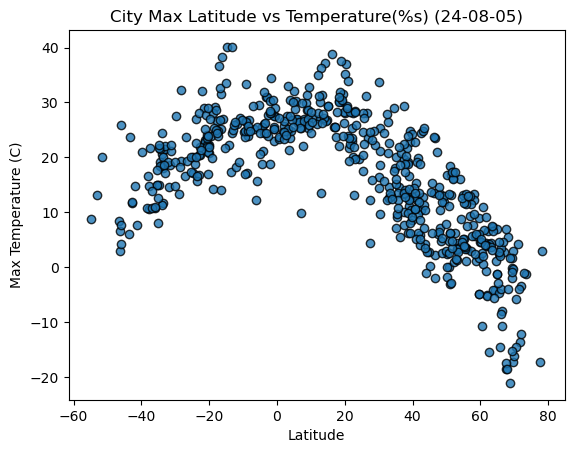

In [129]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],
            city_data_df['Max Temp'],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
date = time.strftime('%y-%m-%d')
plt.title(f"City Max Latitude vs Temperature(%s) ({date})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")


# Save the figure
plt.savefig(r"C:\Users\vanes\python-api-challenge\WeatherPy/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

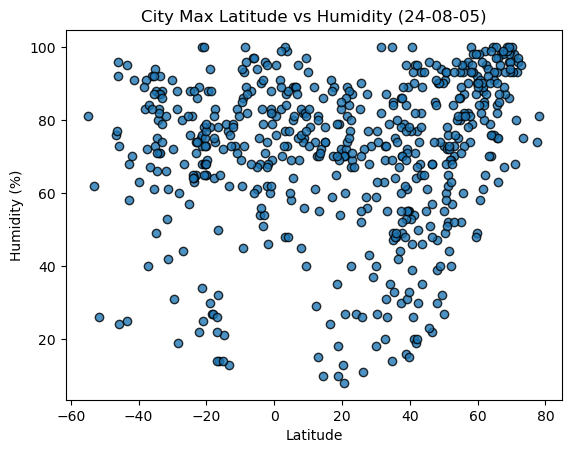

In [130]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],
            city_data_df['Humidity'],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
date = time.strftime('%y-%m-%d')
plt.title(f"City Max Latitude vs Humidity ({date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig(r"C:\Users\vanes\python-api-challenge\WeatherPy/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

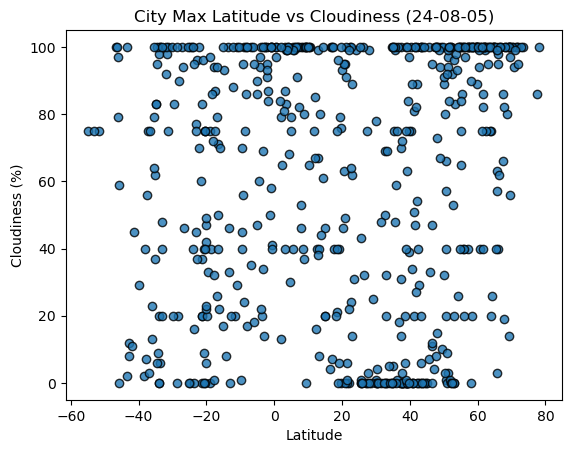

In [131]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],
            city_data_df['Cloudiness'],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
date = time.strftime('%y-%m-%d')
plt.title(f"City Max Latitude vs Cloudiness ({date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig(r"C:\Users\vanes\python-api-challenge\WeatherPy/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

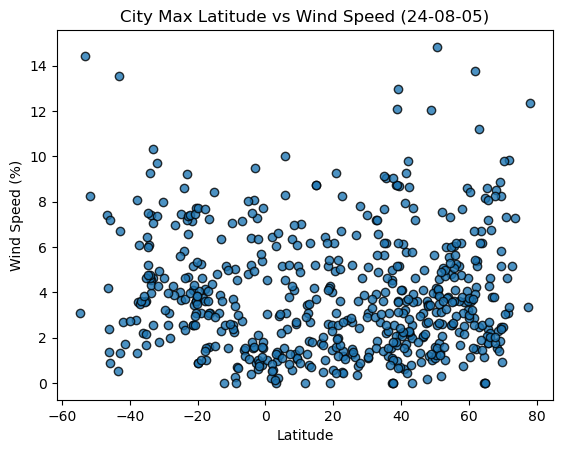

In [132]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],
            city_data_df['Wind Speed'],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
date = time.strftime('%y-%m-%d')
plt.title(f"City Max Latitude vs Wind Speed ({date})")
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig(r"C:\Users\vanes\python-api-challenge\WeatherPy/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [118]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x +{round(intercept,2)}"

    plt.scatter(x_value,y_value)
    plt.plot(x_value, regress_value, 'r-')
    plt.annotate(line_eq, text_coord, fontsize=15, color = 'r')
    plt.xlabel('lat')
    plt.ylabel(title)
    print(f"The r-value is {rvalue ** 2}")
    plt.show()

In [119]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [120]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.7161472181434125


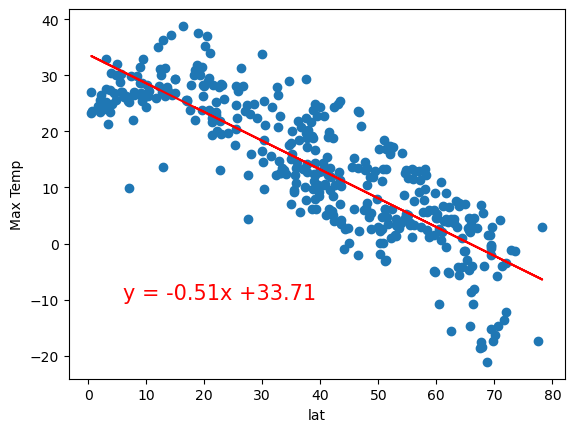

In [121]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, 'Max Temp', (6, -10))

The r-value is 0.4121057168607252


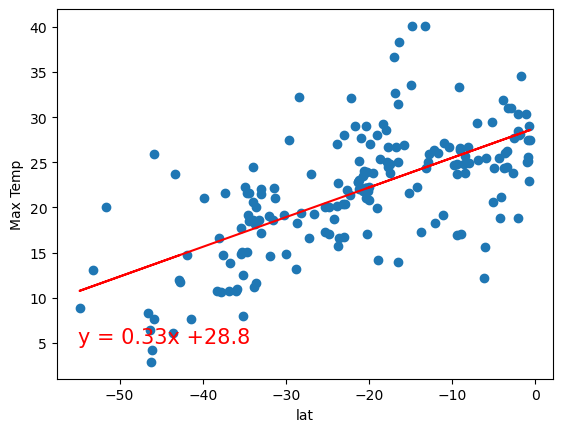

In [122]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, 'Max Temp',(-55, 5))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.05689741545789608


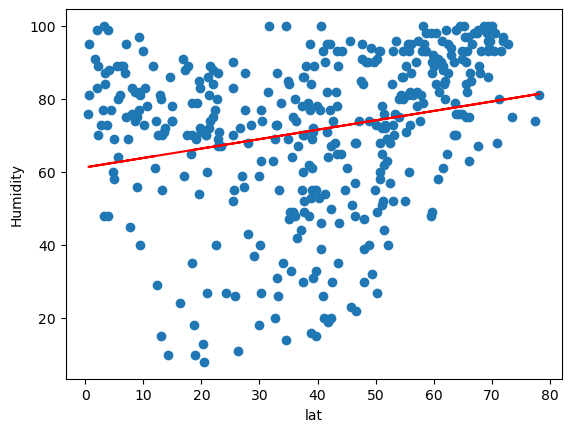

In [123]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, 'Humidity',(6, -10))

The r-value is 0.4121057168607252


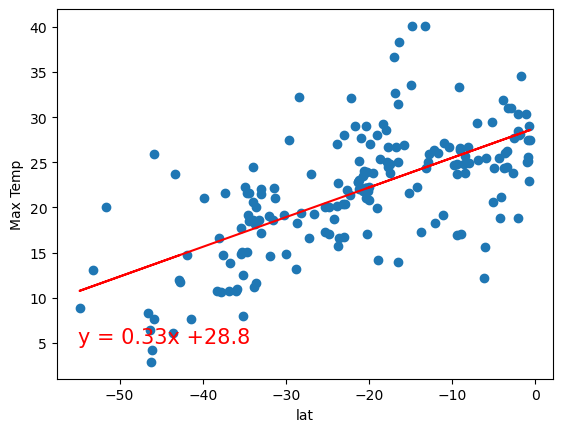

In [124]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, 'Max Temp',(-55, 5))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.05689741545789608


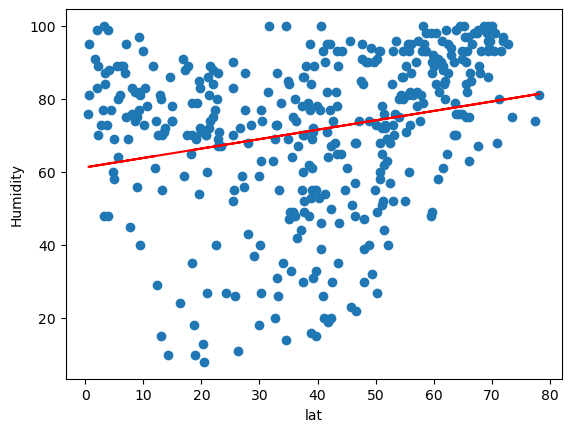

In [125]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, 'Humidity',(6, -10))

The r-value is 0.4121057168607252


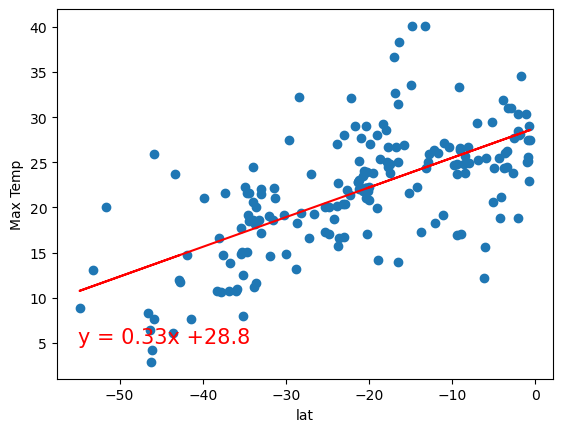

In [126]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, 'Max Temp',(-55, 5))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.05689741545789608


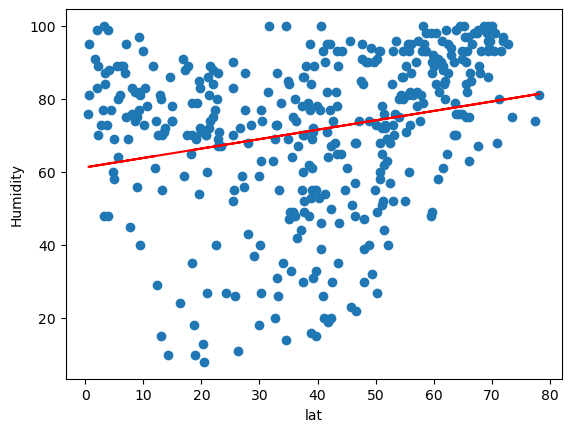

In [127]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, 'Humidity',(6, -10))

The r-value is 0.4121057168607252


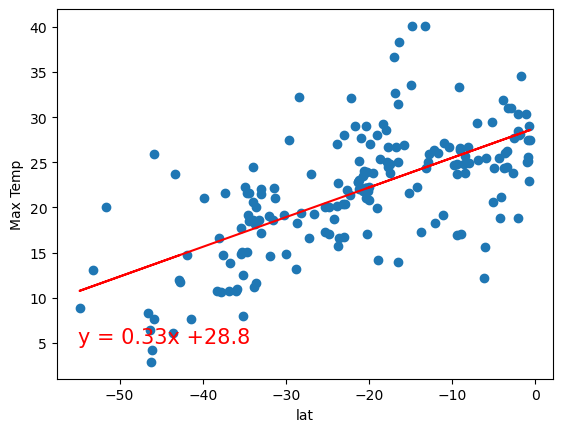

In [128]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, 'Max Temp',(-55, 5))

**Discussion about the linear relationship:** YOUR RESPONSE HERE